# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [2]:
# Write your answer here:
print(2670867)


2670867


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numpy", "statsmodels.api", and "statsmodels.formula.api" libraries

In [65]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf



<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [25]:
# Write your answer here
file_path = '/Users/allenhung/Documents/GitHub/qtm151/assignments/06-assignment/Data/features.csv'
data = pd.read_csv(file_path)

data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

check_horsepower = lambda x: x > 100

#shows True if horsepower > 100, else False
horsepower_check = data['horsepower'].apply(check_horsepower).tolist()

# Step 4: Count how many cars have horsepower > 100
count_above_100 = sum(horsepower_check)

# Display results
print("List of horsepower checks:", horsepower_check)
print("Number of cars with horsepower > 100:", count_above_100)

    


    

List of horsepower checks: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, True, True, True, True, False, False, False, False, False, True, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, True, False, True, True, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, Fal

<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [75]:
# Write your answer here:

threshold = 3000
#convert it to integer
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
data.query("weight > @threshold")

# Display the filtered results


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,predicted_weight
0,18.0,8,307,130.0,3504,12.0,C-1689780,3427.833863
1,15.0,8,350,165.0,3693,11.5,B-1689791,3491.931067
2,18.0,8,318,150.0,3436,11.0,P-1689802,3556.028270
3,16.0,8,304,150.0,3433,12.0,A-1689813,3427.833863
4,17.0,8,302,140.0,3449,10.5,F-1689824,3620.125474
...,...,...,...,...,...,...,...,...
364,26.6,8,350,105.0,3725,19.0,O-1693784,2530.473013
365,20.2,6,200,88.0,3060,17.1,F-1693795,2774.042387
366,17.6,6,225,85.0,3465,16.6,C-1693806,2838.139590
374,23.0,4,151,NaN,3035,20.5,A-1693894,2338.181403


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

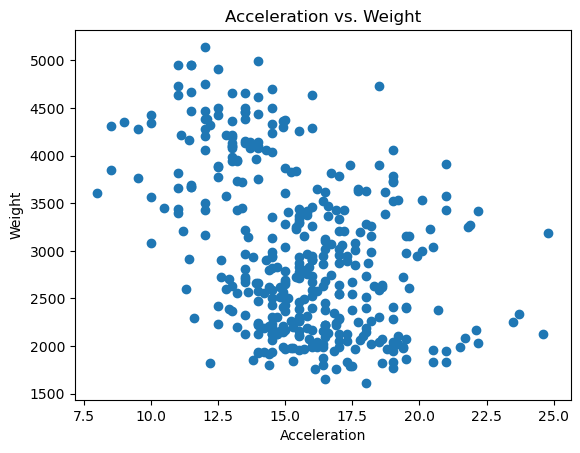

Intercept: 4966.1667491489425
Coefficient: -128.1944071530931


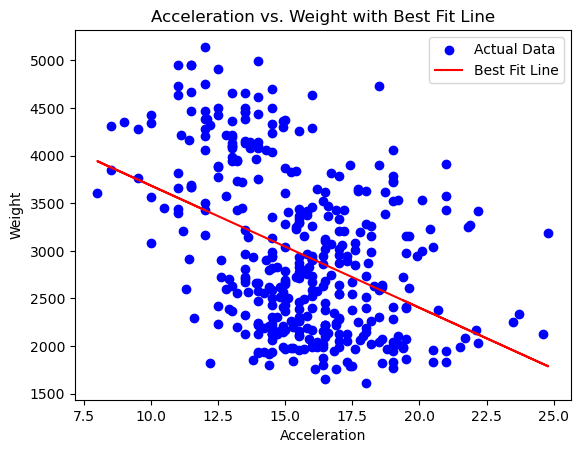

In [74]:
plt.scatter(x=data["acceleration"], y=data["weight"])
plt.xlabel('Acceleration')
plt.ylabel('Weight')
plt.title('Acceleration vs. Weight')
plt.show()

X = sm.add_constant(data['acceleration'])  #Adds a constant term for the intercept
y = data['weight']

# Step 3: Fit the OLS model
model = sm.OLS(y, X).fit()  #Corrected order of arguments
intercept = model.params['const']
coefficient = model.params['acceleration']  # Change 'weight' to 'acceleration'
print("Intercept: " + str(intercept))
print("Coefficient: " + str(coefficient))

#Compute predicted values of weight
data['predicted_weight'] = intercept + coefficient * data['acceleration']

#Plot actual data and best fit line
plt.scatter(data['acceleration'], data['weight'], color='blue', label='Actual Data')
plt.plot(data['acceleration'], data['predicted_weight'], color='red', label='Best Fit Line')
plt.xlabel('Acceleration')
plt.ylabel('Weight')
plt.title('Acceleration vs. Weight with Best Fit Line')
plt.legend()
plt.show()

<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [73]:
# Write your own code
df = pd.read_csv("data/fifa23_players_basic.csv")
df_sorted = df.sort_values(by='Age',ascending = True)
print(df_sorted.iloc[:5])




            Known As        Full Name  Overall  Potential  Value(in Euro)  \
17956     A. Dithmer  Andreas Dithmer       53         76          275000   
18014      J. Ardila      José Ardila       53         73          250000   
16084       S. Ngoma      Serge Ngoma       58         82          650000   
11481      O. Vargas      Obed Vargas       64         81         1500000   
17591  A. Madaliński  Alan Madaliński       54         68          210000   

      Positions Played Best Position    Nationality  \
17956               GK            GK        Denmark   
18014               CM           CAM      Venezuela   
16084               RW            RM  United States   
11481        CM,CDM,RM           CAM  United States   
17591               GK            GK         Poland   

                                             Image Link  Age  ...  \
17956  https://cdn.sofifa.net/players/269/573/23_60.png   16  ...   
18014  https://cdn.sofifa.net/players/268/892/23_60.png   16  ...   

<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [72]:
# Write your own code
df = pd.read_csv("data/fifa23_players_basic.csv")
mean_value=df['Value(in Euro)'].mean()
players_above_mean = df.query('`Value(in Euro)` > @mean_value')
print(players_above_mean)




            Known As           Full Name  Overall  Potential  Value(in Euro)  \
0           L. Messi        Lionel Messi       91         91        54000000   
1         K. Benzema       Karim Benzema       91         91        64000000   
2     R. Lewandowski  Robert Lewandowski       91         91        84000000   
3       K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4          K. Mbappé       Kylian Mbappé       91         95       190500000   
...              ...                 ...      ...        ...             ...   
7066       F. Rieder       Fabian Rieder       68         83         2900000   
7071     J. Bakayoko      Johan Bakayoko       68         85         3100000   
7090        M. Arezo        Matías Arezo       68         81         2900000   
7096       Y. Kallon        Yayah Kallon       68         82         3000000   
7168        M. Soulé        Matías Soulé       68         85         3100000   

     Positions Played Best Position   N

<font size = "5">